In [6]:
from datetime import datetime
from glob import glob
import os

from matplotlib import pyplot as plt
import pyart

import cartopy.crs as ccrs

In [10]:
grid_root = '/scratch/kl02/jss548/cp2_level_1b/v2020/grid_150km_1000m'
ppi_root = '/scratch/kl02/jss548/cp2_level_1b/v2020/ppi'
image_root = '/scratch/kl02/jss548/cp2_level_1b/v2020/images-testing'
date_str = '20141127'
start_idx = 70
level_tilt_list = [[0,0],[1,0],[2,1],[3,1],[4,2],[5,2],[6,3],[7,3]]


min_lon = 152.25
max_lon = 154.25
min_lat = -26.8
max_lat = -28.8

In [11]:
#build paths
date_dt = datetime.strptime(date_str, '%Y%m%d')
grid_path = f'{grid_root}/{date_dt.year}/{date_str}'
grid_ffn_list = sorted(glob(grid_path + '/*.nc'))
ppi_path = f'{ppi_root}/{date_dt.year}/{date_str}'
ppi_ffn_list = sorted(glob(ppi_path + '/*.nc'))

image_folder = f'{image_root}/{date_str}'
try:
    os.makedirs(image_folder)
except:
    pass

/g/data/en0/jss548/miniconda3/envs/radar-dev/lib/python3.8/site-packages/pyart/io/grid_io.py:105: UserWarning: Field longitude skipped due to incorrect shape (301, 301)
  warnings.warn(
/g/data/en0/jss548/miniconda3/envs/radar-dev/lib/python3.8/site-packages/pyart/io/grid_io.py:105: UserWarning: Field latitude skipped due to incorrect shape (301, 301)
  warnings.warn(
/g/data/en0/jss548/miniconda3/envs/radar-dev/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/g/data/en0/jss548/miniconda3/envs/radar-dev/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


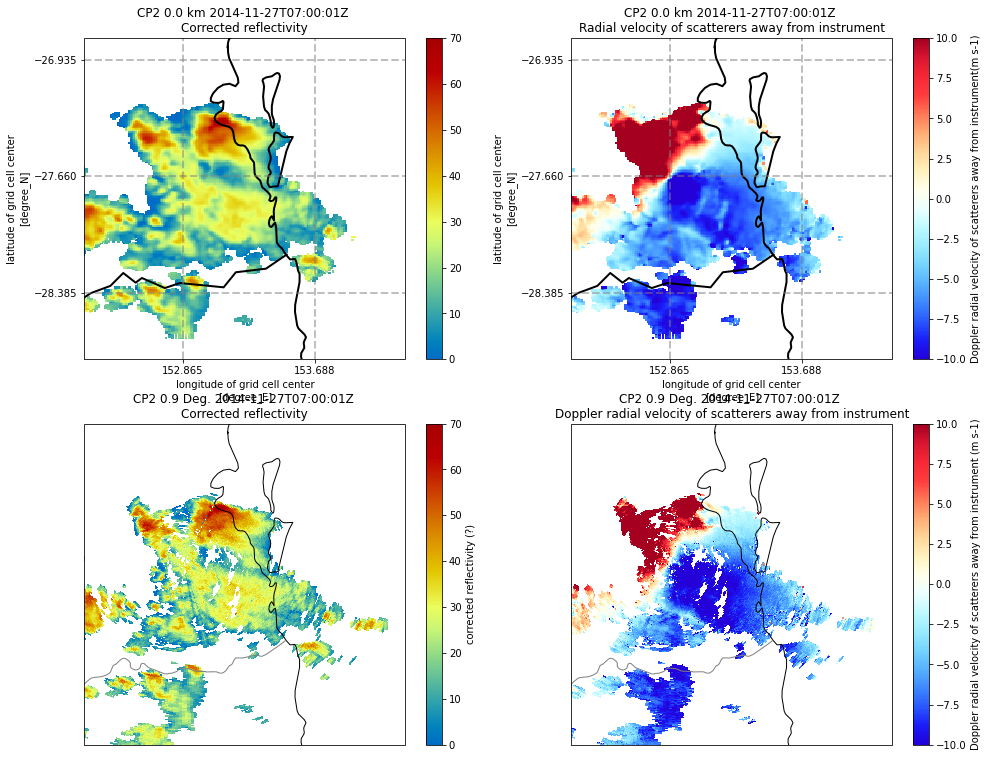

In [12]:
#build images

grid_ffn = grid_ffn_list[start_idx]
ppi_ffn = ppi_ffn_list[start_idx]

for level_tilt in level_tilt_list:
    
    #load grid
    grid = pyart.io.read_grid(grid_ffn)
    radar = pyart.io.read(ppi_ffn)
    #plot it up!
    grid_gr = pyart.graph.GridMapDisplay(grid)
    ppi_gr = pyart.graph.RadarMapDisplay(radar)
    fig = plt.figure(figsize=(16, 13))
    
    level = level_tilt[0]
    tilt = level_tilt[1]
    
    #grid reflectivity
    ax = plt.subplot(221, projection=ccrs.PlateCarree())
    grid_gr.plot_grid('corrected_reflectivity', level=level, ax=ax, vmin=0, vmax=70)
    ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
    #grid velocity
    ax = plt.subplot(222, projection=ccrs.PlateCarree())
    grid_gr.plot_grid('corrected_velocity', level=level, ax=ax, vmin=-10, vmax=10)
    ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
    #ppi velocity
    ax = plt.subplot(223, projection=ccrs.PlateCarree())
    ppi_gr.plot_ppi_map('corrected_reflectivity', sweep=tilt, ax=ax, vmin=0, vmax=70, resolution = '10m')
    ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
    #ppi corrected velocity
    ax = plt.subplot(224, projection=ccrs.PlateCarree())
    ppi_gr.plot_ppi_map('corrected_velocity', sweep=tilt, ax=ax, vmin=-10, vmax=10, resolution = '10m')
    ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())    
    
    #save
    image_ffn = f'{image_folder}/501_{date_str}_level_{level:02}.png'
    plt.savefig(image_ffn, dpi=100)
    break
    #plt.close()
    print('finished', image_ffn)
    